# Face Recognition (GOOGLE COLAB)

In [1]:
!nvidia-smi

Fri Jun 12 17:34:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [0]:
%tensorflow_version 2.x

In [3]:
!pip install -q keras==2.3.0

     |████████████████████████████████| 378kB 2.8MB/s 


In [4]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.3.0


In [0]:
from keras.preprocessing import image as kimage
from keras.models import Model
from keras.layers import Dense, Dropout, BatchNormalization

In [0]:
import matplotlib.pyplot as plt
import numpy as np

# (Mount Google Drive from the menu on the left)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Split pictures folder in train/test/val

(if not done already)

In [0]:
import sys
sys.path.insert(1, '/content/drive/My Drive/2D/')

In [0]:
import utils_2d

In [0]:
# # Creating Train / Val / Test folders (One time use)
root_dir = '/content/drive/My Drive/2D/pictures_masked_resized_heavy'
dest_dir = '/content/drive/My Drive/2D/pictures_masked_resized_heavy_split'

In [0]:
!ls "$root_dir"

alessandro  alinda  cami  gian	khaled	luca  mamma  papi


In [0]:
# utils_2d.pictures_train_test_val_split(root_dir, dest_dir, verbose=True)

# Define Train/test/val sets

In [0]:
#my_pictures_dir ="/content/drive/My Drive/2D/pictures_masked_resized_heavy_split"
my_pictures_dir ="/content/drive/My Drive/pictures_masked_resized_split"

In [0]:
train_dir = my_pictures_dir+"/train"
val_dir = my_pictures_dir+"/val"
test_dir = my_pictures_dir+"/test"

In [10]:
!ls "$my_pictures_dir/test"

alessandro  alinda  cami  gian	khaled	luca  mamma  papi


Set the classes that the classifier should learn:

In [0]:
classes = ["alessandro", "alinda", "cami", "gian", "khaled", "mamma", "papi"]

In [0]:
color_mode = "grayscale"

## Sample from train set

The following is kept commented in case of future testing with featurewise center/std

In [0]:
# sample_processing = kimage.ImageDataGenerator()
# sample_generator = sample_processing.flow_from_directory(train_dir, classes = classes,
#                                                          # rescale= 1./255,
#                                                          target_size=(224, 224),
#                                                          color_mode=color_mode,
#                                                          batch_size=64,
#                                                          class_mode="categorical",
#                                                          shuffle=True,
#                                                          seed=1)

In [0]:
# sample = sample_generator.next()
# sample_features = sample[0]
# sample_labels = sample[1]

In [0]:
# plt.imshow(sample_features[5][:,:,0], cmap="gray")

## Generators

In [0]:
train_processing = kimage.ImageDataGenerator(
    # featurewise_center=True, # UNCOMMENT for testing with previous code
    # featurewise_std_normalization=True, # UNCOMMENT for testing with previous
    rescale= 1./255, # COMMENT for testing with previous
    # Rotations
    # rotation_range=10,
    # # Shifts
    # width_shift_range=0.1,
    # height_shift_range=0.1,
    # # Flips
    horizontal_flip=True,
    # vertical_flip=True,
    # Brightness Change
    brightness_range=[0.6,1.4],
    # Zoom Change
    # zoom_range=[0.9,1.1] # TODO: test without this
)

In [0]:
# train_processing.fit(sample_features) # UNCOMMENT for testing with previous code

In [0]:
# train_processing.mean

In [19]:
train_generator = train_processing.flow_from_directory(train_dir,
                                                       classes = classes,
                                                       target_size=(224, 224),
                                                       color_mode=color_mode,
                                                       batch_size=32,
                                                       class_mode="categorical",
                                                       shuffle=True,
                                                       seed=1)

Found 2247 images belonging to 7 classes.


In [20]:
labels_to_text = [i[0] for i in train_generator.class_indices.items()]
labels_to_text

['alessandro', 'alinda', 'cami', 'gian', 'khaled', 'mamma', 'papi']

In [21]:
test_processing = kimage.ImageDataGenerator(# featurewise_center=True,
                                            # featurewise_std_normalization=True
                                            rescale = 1./255,
                                            )
# test_processing.fit(sample_features) # UNCOMMENT for testing with previous code

val_generator = test_processing.flow_from_directory(val_dir,
                                                    classes = classes,
                                                    target_size=(224, 224),
                                                    color_mode=color_mode,
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=False,
                                                    seed=1)

test_generator = test_processing.flow_from_directory(test_dir,
                                                     classes = classes,
                                                     target_size=(224, 224),
                                                     color_mode=color_mode,
                                                     batch_size=32,
                                                     class_mode="categorical",
                                                     shuffle=False,
                                                     seed=1)

Found 584 images belonging to 7 classes.
Found 322 images belonging to 7 classes.


In [22]:
n_classes = (train_generator.num_classes)
n_classes

7

### See images

In [0]:
batch = np.array(train_generator.next()[0])

In [24]:
batch.shape

(32, 224, 224, 1)

In [0]:
# mu = train_processing.mean # UNCOMMENT for testing with previous code
# sigma = train_processing.std # UNCOMMENT for testing with previous code

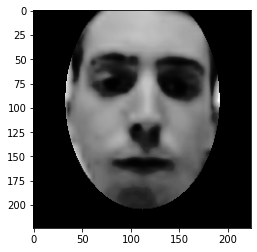

In [26]:
pic = batch[6]
# plt.imshow(((pic*sigma + mu)/255)[:,:,0], cmap="gray")
plt.imshow(pic[:,:,0], cmap="gray")
plt.show()

In [27]:
input_shape = pic.shape
input_shape

(224, 224, 1)

# Net

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
net = Sequential()
#add model layers
net.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
net.add(Conv2D(32, kernel_size=3, activation='relu'))
net.add(Flatten())
net.add(Dense(n_classes, activation='softmax'))

In [0]:
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=["accuracy"])

In [0]:
callback = keras.callbacks.EarlyStopping(monitor='val_loss',
                                         restore_best_weights=True, patience=5)

In [61]:
history = net.fit_generator(train_generator,
                  verbose=1,
                  epochs=50,
                  steps_per_epoch=train_generator.n//train_generator.batch_size,
                  callbacks=[callback],
                  validation_data=val_generator)

Epoch 1/50
70/70 [==============================] - 8s 121ms/step - loss: 3.4264 - accuracy: 0.6492 - val_loss: 0.6853 - val_accuracy: 0.9384
Epoch 2/50
70/70 [==============================] - 8s 119ms/step - loss: 0.4132 - accuracy: 0.9205 - val_loss: 0.3187 - val_accuracy: 0.9692
Epoch 3/50
70/70 [==============================] - 8s 119ms/step - loss: 0.3361 - accuracy: 0.9485 - val_loss: 0.0386 - val_accuracy: 0.9829
Epoch 4/50
70/70 [==============================] - 8s 119ms/step - loss: 0.1610 - accuracy: 0.9824 - val_loss: 0.0105 - val_accuracy: 0.9846
Epoch 5/50
70/70 [==============================] - 8s 118ms/step - loss: 0.1126 - accuracy: 0.9743 - val_loss: 1.1610e-04 - val_accuracy: 0.9075
Epoch 6/50
70/70 [==============================] - 8s 119ms/step - loss: 0.0501 - accuracy: 0.9892 - val_loss: 0.2514 - val_accuracy: 0.9897
Epoch 7/50
70/70 [==============================] - 8s 117ms/step - loss: 0.2101 - accuracy: 0.9720 - val_loss: 0.0022 - val_accuracy: 0.9897
Ep

# Save Model

In [0]:
import os

In [0]:
latest_model_number = max([int(e.split("_")[0]) for e in os.listdir("/content/drive/My Drive/2D/models/")])

In [0]:
model_name = latest_model_number + 1

In [65]:
model_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.h5"
json_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.json"
model_filename, json_filename

('/content/drive/My Drive/2D/models/2_model.h5',
 '/content/drive/My Drive/2D/models/2_model.json')

In [0]:
# mu = list(train_processing.mean[0][0])
# std = list(train_processing.std[0][0])

In [67]:
d = {}
# d["mean"] = [str(i) for i in mu]
# d["std"] = [str(i) for i in std]
d["mask"] = True
d["model_n"] = model_name
d["featurewise_center"] = False
d["featurewise_std"] = False
d["class_indices"] = [i[0] for i in train_generator.class_indices.items()]

d

{'class_indices': ['alessandro',
  'alinda',
  'cami',
  'gian',
  'khaled',
  'mamma',
  'papi'],
 'featurewise_center': False,
 'featurewise_std': False,
 'mask': True,
 'model_n': 2}

In [0]:
import json

In [0]:
with open(json_filename, "w") as jsonf:
    json.dump(d, jsonf)

In [0]:
net.save(model_filename)

### Evaluation


In [0]:
import numpy as np
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import classification_report

In [72]:
net.evaluate_generator(train_generator)

[1.2992910146713257, 0.8971962332725525]

In [73]:
net.evaluate_generator(val_generator)

[0.00011610061483224854, 0.9075342416763306]

In [0]:
def classification_report_generator(generator):
  # should not be applied to generators with shuffle = True
  preds = net.predict_generator(generator)
  preds = np.argmax(preds, axis=1)
  real = generator.classes
  ind_dict = generator.class_indices
  num_to_label = [i[0] for i in ind_dict.items()]
  cmat = cm(real, preds)
  cr = classification_report(real, preds, target_names=num_to_label)
  return cmat, cr

In [77]:
cm_val, cr_val = classification_report_generator(val_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       1.00      1.00      1.00        92
      alinda       1.00      0.70      0.82        92
        cami       1.00      0.83      0.90        92
        gian       0.87      1.00      0.93        92
      khaled       1.00      0.89      0.94        92
       mamma       0.79      1.00      0.88        92
        papi       0.67      1.00      0.80        32

    accuracy                           0.91       584
   macro avg       0.90      0.92      0.90       584
weighted avg       0.93      0.91      0.91       584



# Alternative model
For reducing a bit the dimensionality inside the network I will add a MaxPooling layer before the dense one, let's see the performances:

In [0]:
from keras.layers import MaxPooling2D
#create model
net = Sequential()
#add model layers
net.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
net.add(Conv2D(32, kernel_size=3, activation='relu'))
net.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))
net.add(Flatten())
net.add(Dense(n_classes, activation='softmax'))

In [79]:
print(net.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 222, 222, 64)      640       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 220, 220, 32)      18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 380192)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 7)                 2661351   
Total params: 2,680,455
Trainable params: 2,680,455
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=["accuracy"])

In [81]:
history = net.fit_generator(train_generator,
                  verbose=1,
                  epochs=50,
                  steps_per_epoch=train_generator.n//train_generator.batch_size,
                  callbacks=[callback],
                  validation_data=val_generator)

Epoch 1/50
70/70 [==============================] - 8s 118ms/step - loss: 1.2590 - accuracy: 0.6781 - val_loss: 0.1257 - val_accuracy: 0.9555
Epoch 2/50
70/70 [==============================] - 8s 117ms/step - loss: 0.1846 - accuracy: 0.9540 - val_loss: 0.2144 - val_accuracy: 0.9726
Epoch 3/50
70/70 [==============================] - 8s 117ms/step - loss: 0.1436 - accuracy: 0.9679 - val_loss: 0.3896 - val_accuracy: 0.9897
Epoch 4/50
70/70 [==============================] - 8s 115ms/step - loss: 0.1121 - accuracy: 0.9716 - val_loss: 0.1883 - val_accuracy: 0.9897
Epoch 5/50
70/70 [==============================] - 8s 115ms/step - loss: 0.0527 - accuracy: 0.9865 - val_loss: 0.0141 - val_accuracy: 0.9829
Epoch 6/50
70/70 [==============================] - 8s 114ms/step - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0044 - val_accuracy: 0.9863
Epoch 7/50
70/70 [==============================] - 8s 114ms/step - loss: 0.2273 - accuracy: 0.9851 - val_loss: 0.0093 - val_accuracy: 0.9812
Epoch 

In [82]:
net.evaluate_generator(train_generator)

[0.0055735451169312, 0.9968847632408142]

In [83]:
net.evaluate_generator(val_generator)

[0.004366896115243435, 0.9863013625144958]

In [84]:
cm_val, cr_val = classification_report_generator(val_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       1.00      1.00      1.00        92
      alinda       0.99      1.00      0.99        92
        cami       0.99      0.99      0.99        92
        gian       0.99      0.99      0.99        92
      khaled       1.00      0.93      0.97        92
       mamma       0.98      1.00      0.99        92
        papi       0.91      1.00      0.96        32

    accuracy                           0.99       584
   macro avg       0.98      0.99      0.98       584
weighted avg       0.99      0.99      0.99       584



Training time takes 1 iteration more, however the classification report show better performances.
Let's store it for the moment.

In [0]:
latest_model_number = max([int(e.split("_")[0]) for e in os.listdir("/content/drive/My Drive/2D/models/")])
model_name = latest_model_number + 1
model_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.h5"
json_filename = f"/content/drive/My Drive/2D/models/{model_name}_model.json"
d = {}
# d["mean"] = [str(i) for i in mu]
# d["std"] = [str(i) for i in std]
d["mask"] = True
d["model_n"] = model_name
d["featurewise_center"] = False
d["featurewise_std"] = False
d["class_indices"] = [i[0] for i in train_generator.class_indices.items()]
with open(json_filename, "w") as jsonf:
    json.dump(d, jsonf)
net.save(model_filename)

In [87]:
copy_of_history = history

Another thing we can try is to double the steps per epoch parameter, so that more horizontal flips and brightness changes are performed

In [0]:
#create model
net = Sequential()
#add model layers
net.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))
net.add(Conv2D(32, kernel_size=3, activation='relu'))
net.add(MaxPooling2D(pool_size=(4, 4), strides=(2, 2)))
net.add(Flatten())
net.add(Dense(n_classes, activation='softmax'))
net.compile(loss=keras.losses.categorical_crossentropy,
            optimizer=keras.optimizers.RMSprop(),
            metrics=["accuracy"])

In [90]:
doubled_steps_per_epoch = 2 * (train_generator.n//train_generator.batch_size)
history = net.fit_generator(train_generator,
                  verbose=1,
                  epochs=50,
                  steps_per_epoch=doubled_steps_per_epoch,
                  callbacks=[callback],
                  validation_data=val_generator)

Epoch 1/50
140/140 [==============================] - 16s 112ms/step - loss: 0.9029 - accuracy: 0.8038 - val_loss: 0.0698 - val_accuracy: 0.9658
Epoch 2/50
140/140 [==============================] - 16s 111ms/step - loss: 0.0721 - accuracy: 0.9833 - val_loss: 0.0755 - val_accuracy: 0.9914
Epoch 3/50
140/140 [==============================] - 15s 109ms/step - loss: 0.0298 - accuracy: 0.9901 - val_loss: 0.3547 - val_accuracy: 0.9521
Epoch 4/50
140/140 [==============================] - 15s 109ms/step - loss: 0.0503 - accuracy: 0.9914 - val_loss: 0.3071 - val_accuracy: 0.9914
Epoch 5/50
140/140 [==============================] - 15s 106ms/step - loss: 0.0510 - accuracy: 0.9935 - val_loss: 0.4972 - val_accuracy: 0.9914
Epoch 6/50
140/140 [==============================] - 15s 107ms/step - loss: 0.0984 - accuracy: 0.9901 - val_loss: 0.0015 - val_accuracy: 0.8322
Epoch 7/50
140/140 [==============================] - 15s 107ms/step - loss: 0.0238 - accuracy: 0.9964 - val_loss: 0.1613 - val_ac

In [91]:
net.evaluate_generator(train_generator)

[0.1061246246099472, 0.8344459533691406]

In [92]:
net.evaluate_generator(val_generator)

[0.0015082050813362002, 0.8321917653083801]

In [93]:
cm_val, cr_val = classification_report_generator(val_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       0.91      1.00      0.95        92
      alinda       0.97      0.96      0.96        92
        cami       1.00      0.97      0.98        92
        gian       0.60      0.99      0.75        92
      khaled       1.00      0.45      0.62        92
       mamma       1.00      0.58      0.73        92
        papi       0.55      1.00      0.71        32

    accuracy                           0.83       584
   macro avg       0.86      0.85      0.82       584
weighted avg       0.89      0.83      0.83       584



# Evaluation of best model
The best model is the one obtained after adding a MaxPoolLayer. Let's evaluate it:

In [0]:
from keras.models import load_model
net = load_model(model_filename)

In [96]:
net.evaluate_generator(test_generator)

[1.4185728105076123e-05, 0.9906832575798035]

In [97]:
cm_val, cr_val = classification_report_generator(val_generator)
print(cr_val)

              precision    recall  f1-score   support

  alessandro       1.00      1.00      1.00        92
      alinda       0.99      1.00      0.99        92
        cami       0.99      0.99      0.99        92
        gian       0.99      0.99      0.99        92
      khaled       1.00      0.93      0.97        92
       mamma       0.98      1.00      0.99        92
        papi       0.91      1.00      0.96        32

    accuracy                           0.99       584
   macro avg       0.98      0.99      0.98       584
weighted avg       0.99      0.99      0.99       584



In [98]:
cm_test, cr_test = classification_report_generator(test_generator)
print(cr_test)

              precision    recall  f1-score   support

  alessandro       1.00      1.00      1.00        46
      alinda       1.00      1.00      1.00        46
        cami       1.00      0.98      0.99        46
        gian       1.00      0.98      0.99        46
      khaled       0.96      1.00      0.98        46
       mamma       0.98      0.98      0.98        46
        papi       1.00      1.00      1.00        46

    accuracy                           0.99       322
   macro avg       0.99      0.99      0.99       322
weighted avg       0.99      0.99      0.99       322



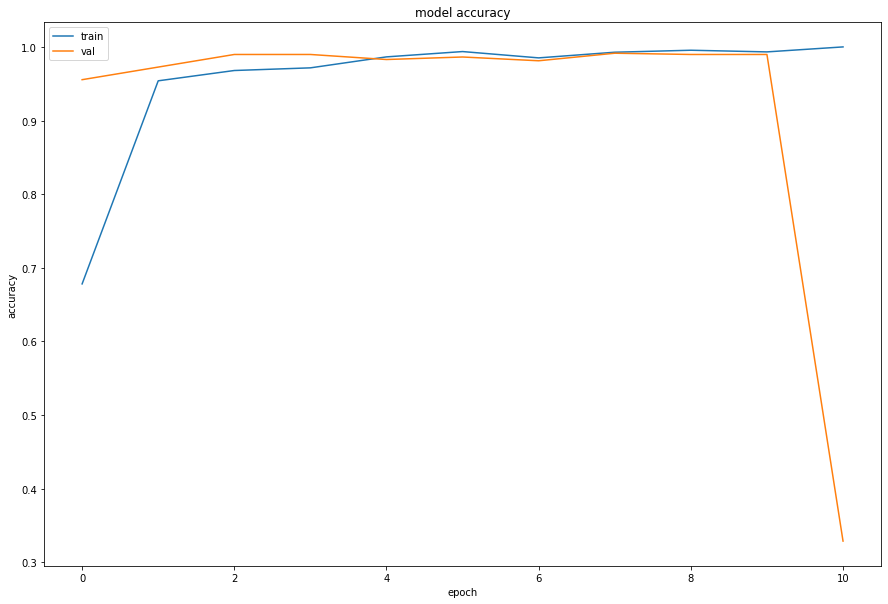

In [99]:
history=copy_of_history
plt.figure(figsize=(15,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

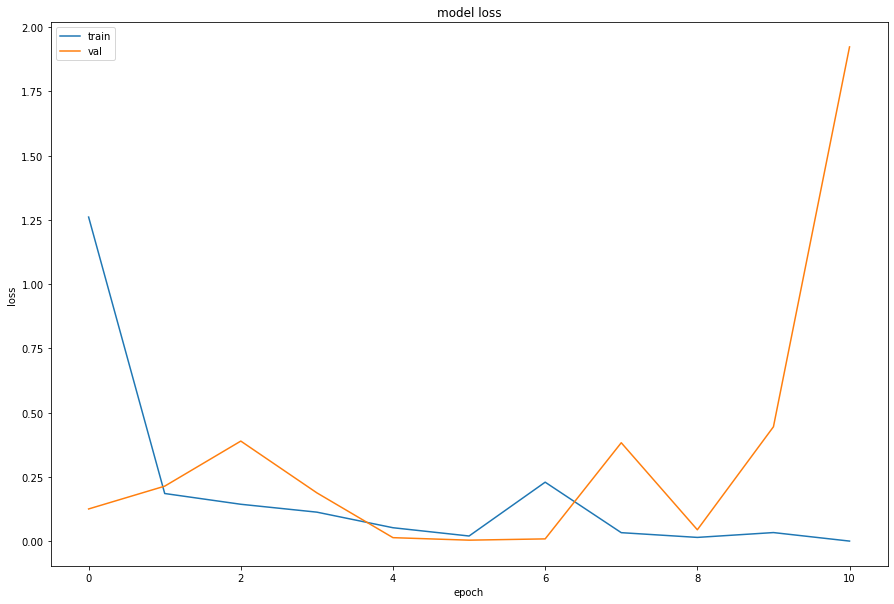

In [100]:
plt.figure(figsize=(15,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# TODO

- Try different architectures
- Collect more data?
- look at these? 
  - https://github.com/Golbstein/keras-face-recognition
  - https://github.com/krasserm/face-recognition